## Notebook to produce transect figures

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import cm
import numpy as np
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['lines.linewidth'] = 3
sns.set_style("darkgrid")
mpl.rcParams.update({'font.size': 18})

In [19]:
glac = '1'
geoid = 31.5

In [13]:
glac = '284'
geoid = 28.5

In [15]:
glac = '288'
geoid = 29.5

In [17]:
glac = '291'
geoid = 31

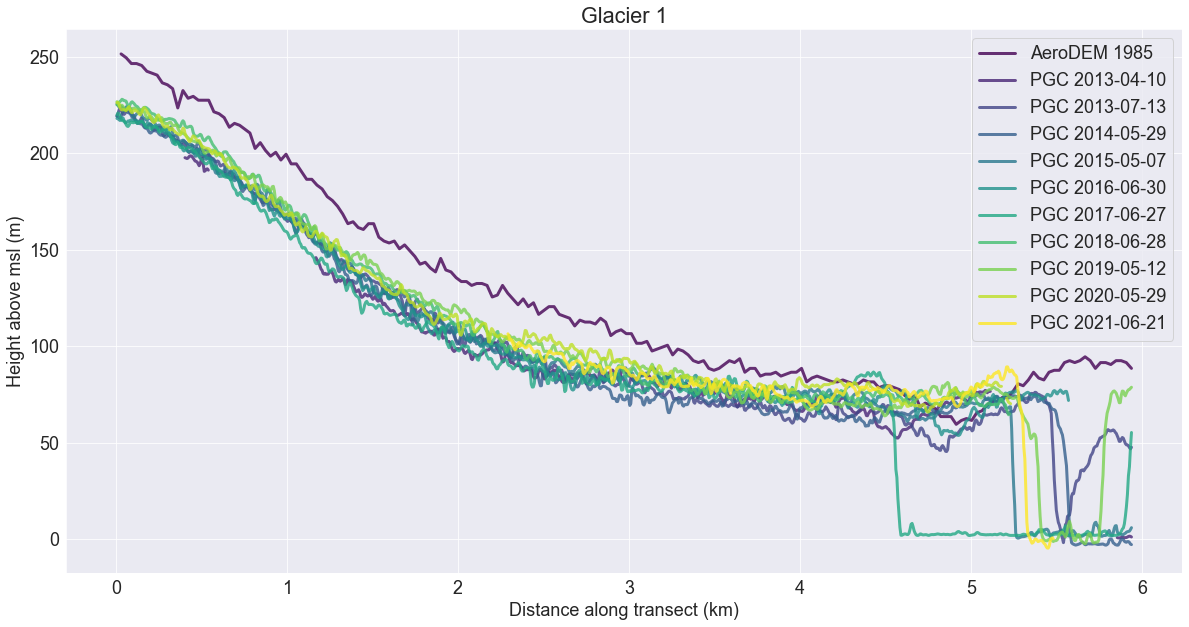

In [20]:
dir_list = os.listdir('Transects\\'+glac)

file_list = []
for file in dir_list:
    if file.endswith('.shp'):
        file_list.append(os.path.join('Transects',glac,file))


fig,ax = plt.subplots(figsize = (20,10))


color = iter(cm.viridis(np.linspace(0, 1, len(file_list))))

for file in file_list:
    c = next(color)
    transect=gpd.read_file(file)
    points_df2 = transect.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
    transect['distance'] = transect.distance(points_df2)
    transect['cumsum']=transect['distance'].cumsum()
    transect['cumsum']=transect['cumsum']/1000
    #transect = transect.mask(transect['Value'] < 60)
    
    if glac == '1':
        if len(file[12:-4]) == 4:
            name = 'AeroDEM ' + file[12:-4]
        else:
            name = file[12:-4]
            y = name[0:4]
            m = name[4:6]
            d = name[6:8]
            name = 'PGC '+y+'-'+m+'-'+d
    else:
        if len(file[14:-4]) == 4:
            name = 'AeroDEM ' + file[14:-4]
        else:
            name = file[14:-4]
            y = name[0:4]
            m = name[4:6]
            d = name[6:8]
            name = 'PGC '+y+'-'+m+'-'+d
    
    transect['Value'] = transect['Value'] - geoid
    
    ax.plot(transect['cumsum'],transect['Value'], label = name, alpha = 0.8, c=c)
ax.legend()
ax.set_title('Glacier '+glac)
ax.set_xlabel('Distance along transect (km)')
ax.set_ylabel('Height above msl (m)')

fig.savefig('Figures/transects/'+glac+'.png')